# Iris Classification @ MAROON DAY DATA SCIENCE 3

Pada pertemuan ini, kita akan membahas mengenai klasifikasi dataset Iris dengan menggunakan alogirtma KNN (k-Nearest Neighbor).

Metadata|Informasi
----|-----
Tanggal|30 November 2019
Waktu|19.00
Pemateri|Fahmi Noor Fiqri, MTA.
Materi|Membuat Klasifikasi Iris dengan k-Nearest Neighbor (KNN)

Pada pertemuan ini kita akan mencoba melakukan tahap-tahap pembuatan model KNN sebagai berikut.

1. Data ingestion
2. Exploration
3. Preprocessing
4. Training
5. Evaluation
6. Optimization

## Data Ingestion

**Data ingestion** adalah tahap untuk mengambil data dari sumber untuk diolah. Pada pertemuan ini kita akan menggunakan sumber data dari UCI Machine Learning yaitu dataset Iris.

https://archive.ics.uci.edu/ml/datasets/Iris

Untuk mendownload dataset-nya, kita bisa buka link di atas dan klik Data Folder untuk mendownload dataset tersebut.

Dari sisi kode, kita akan menggunakan **DataFrame** dari library Pandas. Kita akan menggunakan kode berikut untuk mengimpor fungsi `read_csv` dari library Pandas untuk membaca file CSV.


In [0]:
from pandas import read_csv

Setelah kita mengimpor fungsi `read_csv`, kita akan memanggil fungsi tersebut untuk membaca data dari file `iris.data`. Perlu diketahui bahwa fungsi `read_csv` ini tidak hanya dapat membaca file dari disk, tapi juga bisa membaca file dari URL.

Selain itu, disini kita langsung membaca file `iris.data` langsung ke `DataFrame`, hal ini bisa kita lakukan karena data awal dari file `iris.data` ini sudah dalam format yang CSV yang benar, sehingga bisa langsung kita baca ke dalam `DataFrame`.

Jika file dataset tidak memiliki format yang sesuai, maka perlu dilakukan pembersihan data (data cleaning) terlebih dahulu.

In [0]:
file_path = r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(file_path, names=attributes)

Kode di atas akan membaca file `iris.data` dari URL di atas. Karena di dalam file `iris.data` tidak terdapat kolom/atribut, maka kita perlu menambahkan nama kolom saat memanggil fungsi `read_csv`.

Sekarang kita sudah memiliki dataset di dalam variabel `dataset` yang siap untuk kita olah.

## Data Exploration

Setelah kita mendapatkan data yang akan kita olah, sekarang kita akan melihat bagaimana karakteristik data yang kita punya.

Kita akan menggunakan library `matplotlib` dan `Seaborn` untuk melakukan visualisasi data.

In [0]:
from matplotlib import pyplot
from seaborn import pairplot

Untuk eksplorasi data yang pertama, kita akan melihat 5 data pertama. Ini akan memberikan sedikit gambaran mengenai bagaimana data pada dataset Iris.

In [0]:
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Sekarang kita akan melihat berapa banyak data untuk masing-masing jenis bunga. Pada dataset ini, spesies bunga terdapat pada kolom `class`.

In [0]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Dapat dilihat pada hasil running kode di atas, terdapat masing-masing 50 data untuk setiap spesies bunga. Selanjutnya kita akan menampilkan hubungan-hubungan antara satu atribut dengan atribut lainnya. Disini kita akan menggunakan fungsi `pairplot` dari library `Seaborn`.

Sekarang kita akan melakukan plotting data untuk melihat hubungan antara tiap-tiap variabel pada dataset. Disini kita akan menggunakan fungsi `pairplot` untuk menampilkan plot hubungan antara tiap atribut.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


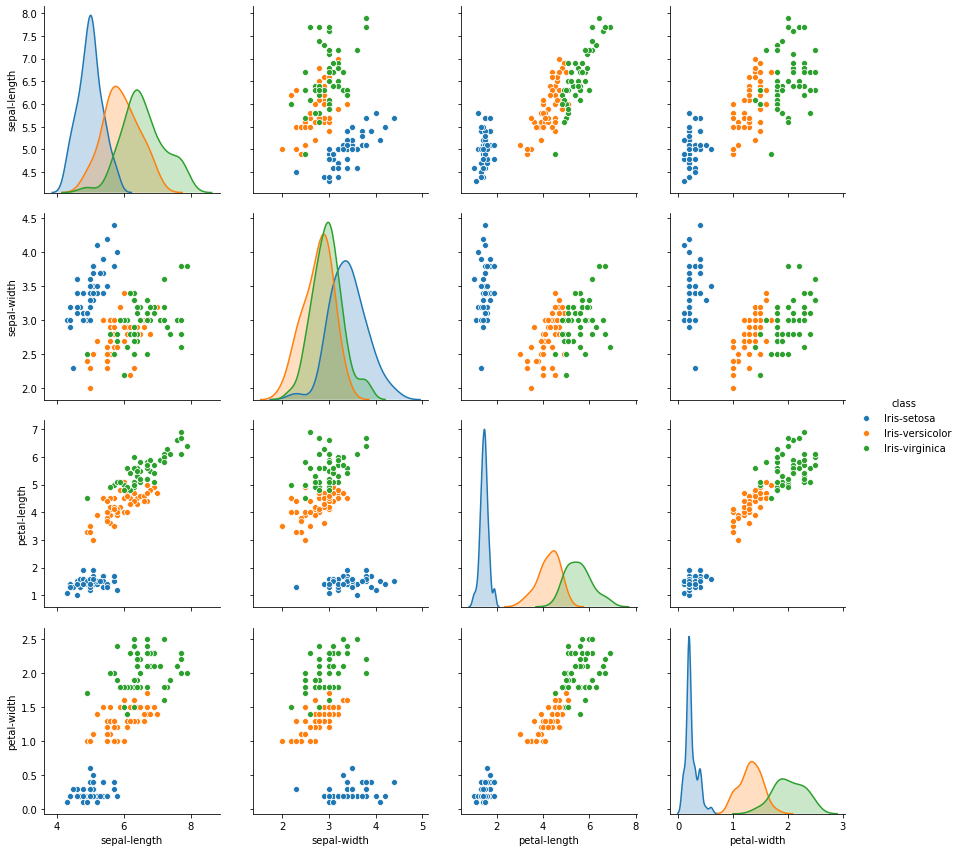

In [0]:
pairplot(dataset, hue='class', size=3)
pyplot.show()

Disini, kita bisa melihat hubungan antara tiap-tiap atribut dengan atribut lainnya. Pada plot diagonal, kita bisa melihat distribusi datanya.

## Preprocessing

Sekarang kita akan mengolah dataset yang kita punya sebelum melakukan training model. Disini kita akan melakukan tiga tahap preprocessing, yaitu:

1. Attribute and label separation, memisahkan dataset menjadi input dan output.
2. Membagi data untuk training dan evaluation.
3. Menskalakan data dengan Standard Scaler (mengubah rata-rata = 0 dan standar deviasi = 1).

### Memisahkan feature dan label

Untuk memisahkan feature dan label, kita dapat menggunakan fungsi `iloc`.

In [0]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Kode di atas berguna untuk memilih kolom 1-4 (sepal length, sepal width, petal length, petal width) sebagai input features dan sisanya (kolom 5, class) sebagai output label.

### Membagi data untuk training dan evaluation

Sekarang kita akan memisahkan data untuk digunakan untuk proses training dan evaluation. Pada contoh ini, kita akan membagi data menjadi 80% data training dan 20% data untuk evaluation (test).

Untuk memisahkan dataset ini, kita bisa menggunakan fungsi `train_test_split` dari library `sklearn`.

In [0]:
from sklearn.model_selection import train_test_split

Setelah kita mengimpor fungsinya, kita bisa panggil fungsi tersebut dengan memberikan parameter input (x) dan output (y).

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Nah sekarang kita punya empat variabel sebagai berikut.

1. `x_train`, data atribut sebagai input untuk melatih algoritma.
2. `y_train`, data atribut output untuk melatih algoritma.
3. `x_test`, data atribut input untuk menguji algoritma.
4. `y_test`, data atribut output untk menguji algoritma.


> Ingat kembali, bahwa untuk variabel dengan awalan `x` memiliki empat kolom/atribut, yaitu *sepal length, sepal width, petal length* dan *petal width*. Sedankan variabel dengan awalan `y` memiliki satu kolom/atribut, yaitu *class*.



### Menskalakan data

Sebelum kita dapat menggunakan data untuk proses training, sebaiknya kita melakukan penskalaan data. Hal ini kita lakukan untuk menyamakan range data agar semua dataset menjadi berimbang sebelum digunakan untuk proses training.

Disini kita akan menggunakan `StandardScaler` untuk melakukan transformasi data. `StandardScaler` akan mengubah dataset yang akan kita olah agar memiliki **rata-rata populasi = 0** dan **standar deviasi = 0**.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Kode di atas akan membuat objek `StandardScaler` yang akan kita gunakan untuk menskalakan data. Sama seperti algoritma lainnya, `StandardScaler` ini juga perlu berlatih dari data untuk mengetahui parameter-parameter yang akan digunakan untuk menskalakan data.

Untuk melatih `StandardScaler`, kita bisa memanggil fungsi `fit`.

In [0]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Setelah kita melatih objek `StandardScaler` kita dengan dataset yang kita miliki, sekarang kita akan mentransformasi dataset untuk training dan test dengan objek `StandardScaler` yang telah kita latih.

In [0]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Training

Sekarang kita akan melatih algoritma KNN kita dengan data training. Disini kita akan membuat objek `KNeighborsClassifier` dengan nilai $k = 3$. Nilai $k$ untuk sementara ini kita set secara acak, artinya kita tidak punya dasar apapun untuk menggunakan angka ini, ini hanya tebakan :)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

Setelah kita membuat objek `KNeighborsClassifier`, kita akan melatih objek KNN kita dengan memanggil fungsi yang sama dengan `StandardScaler`, yaitu dengan memanggil fungsi `fit`.

In [0]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Disini, kita sudah selesai melatih algoritma KNN dan siap untuk diuji. Nah sekarang kita akan menguji apakah model yang telah kita buat memiliki akurasi yang baik sebelum kita gunakan.

Sekarang kita akan melakukan prediksi dengan data uji untuk membandingkan dengan output uji, kemudian kita akan menghitung seberapa baik model yang kita buat.

Kita dapat memanggil fungsi `predict` untuk melakukan prediksi.

In [0]:
y_pred = classifier.predict(x_test)

Sekarang kita memiliki variabel `y_pred`, yang berisi hasil klasifikasi dari classifier KNN yang sudah kita train. Sekarang kita akan melihat statistik akurasi model yang sudah kita buat dengan memanggil fungsi `classification_report`.

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Nah dari hasil di atas, kita bisa melihat output dari confusion matrix. Di atas merupakan hasil statistik untuk temu kembali informasi. Silakan di lihat pada bagian referensi untuk informasi lebih lanjut.

## Optimization

Di bagian akhir ini kita akan mengoptimalkan model yang kita buat agar dapat memberikan hasil prediksi yang lebih baik. Disini kita akan mencoba untuk mencari nilai $k$ yang optimal agar model yang kita buat dapat memberikan hasil prediksi yang lebih akurat.

Kode di bawah ini akan mencoba nilai $k$ dari 1 sampai 40 dan menghitung rata-rata error yang akan dihasilkan.

In [0]:
# lupa numpy
import numpy as np

# variabel error untuk menyimpan data rata-rata error
error = []

# melakukan perulangan untuk nilai k antara 1-40
for i in range(1, 40):
    # membuat classifier dengan k = i
    knn = KNeighborsClassifier(n_neighbors=i)

    # melakukan training dengan dataset
    knn.fit(x_train, y_train)

    # melakukan prediksi dengan data uji
    pred_i = knn.predict(x_test)

    # menghitung rata-rata error untuk hasil uji
    error.append(np.mean(pred_i != y_test))

Nah setelah kita menghitung rata-rata error, sekarang bisa kita plot menjadi sebuah grafik.

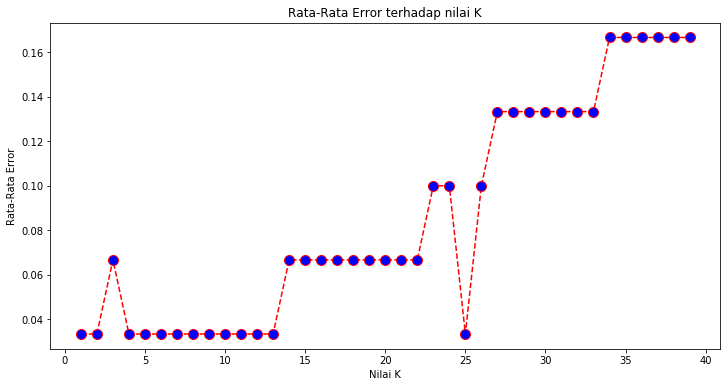

In [0]:
# membuat plot baru hubungan antara nilai k dan rata-rata error prediksi
pyplot.figure(figsize=(12, 6))
pyplot.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pyplot.title('Rata-Rata Error terhadap nilai K')
pyplot.xlabel('Nilai K')
pyplot.ylabel('Rata-Rata Error')
pyplot.show()

Nah dapat dilihat nilai $k$ yang menghasilkan error yang paling rendah dapat kita gunakan untuk nilai parameter $k$. Sekarang kita akan ubah lagi kode di atas sesuai dengan plot yang kita buat disini.

## Penggunaan Model

Setelah kita memiliki model, sekarang kita bisa menggunakan model yang sudah kita buat untuk melakukan prediksi.

In [0]:
# ambil input
sepal_length = 3 #@param {type:"number"}
sepal_width = 4 #@param {type:"number"}
petal_length = 2 #@param {type:"number"}
petal_width = 3 #@param {type:"number"}

# buat vektor untuk uji
x_coba = [[sepal_length, sepal_width, petal_length, petal_width]]

# prediksikan dengan model
y_pred = classifier.predict(x_coba)

# cetak hasil
print("Hasil prediksi: %s" % y_pred[0])

Hasil prediksi: Iris-virginica


Sampai disini, kita sudah berhasil untuk melakukan klasifikasi data.

# Referensi

1. CrashCourse. 2018. The Shape of Data: Distributions: Crash Course Statistics #7 (*https://www.youtube.com/watch?v=bPFNxD3Yg6U*). Diakses 30 November 2019.
2. Wikipedia. 2019. Nonparametric Statistics (*https://en.wikipedia.org/wiki/Non-parametric_statistics*). Diakses 29 November 2019.
3. Navlani, Avinash. 2018. KNN Classification using Scikit-learn (*https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn*). Diakses 30 November 2019.
4. Keen, Ben. 2017. Feature Scaling with scikit-learn (*http://benalexkeen.com/feature-scaling-with-scikit-learn*). Diakses 30 November 2019.
5. Krishnan, Muthu. 2018. Understanding the Classification Report Through sklearn (*https://muthu.co/understanding-the-classification-report-in-sklearn/*). Diakses 30 November 2019.